In [102]:
import matplotlib.pyplot as plt
from skimage import data, io
from sklearn.mixture import GaussianMixture
import numpy as np
import scipy.stats

In [103]:
def plot_gmm_thresh(image, num_class):

    (h, w) = image.shape
    #print('h=', h, 'w=', w)

    data = np.reshape(image, (h*w, 1))
    #print(data.shape)

    gmm = GaussianMixture(n_components=num_class)
    gmm.fit(data)

    binary = gmm.predict(data).reshape((h, w))
    #print(binary)
    
    means = gmm.means_
    vars = gmm.covariances_
    weights = gmm.weights_

    #print(means)
    #print(vars.shape)
    #print(vars)
    #print(weights)

    X = np.arange(0, 256, 1.0)
    #print(X)

    graphs = np.zeros((num_class, 256))
    for k in range(num_class):
        graphs[k] = weights[k]*scipy.stats.norm.pdf(X, means[k], np.sqrt(vars[k]))
    #print(graphs[0])



    output = np.zeros((h, w))
    #print(output[1, 2])
    #for i in range(h):
    #    for j in range(w):
    #        output[i, j] = means[binary[i, j]]

    output = means[binary]
    #print(output)
    
    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256, density=True)
    ax[1].set_title('Histogram')
    #ax[1].axvline(thresh, color='r')
    for k in range(num_class):
        ax[1].plot(X, graphs[k])

    ax[2].imshow(output, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

plt.show()

/tmp/ipykernel_16233/704093916.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


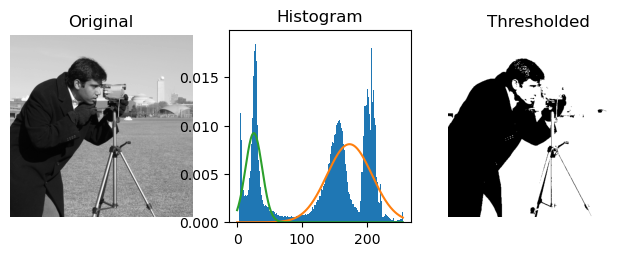

In [104]:
image =data.camera()

plot_gmm_thresh(image, 2)

/tmp/ipykernel_16233/704093916.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


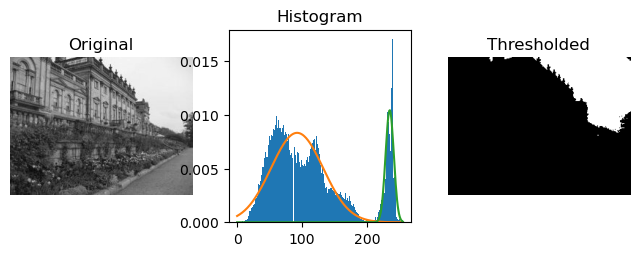

In [110]:
image = io.imread('harewood.jpg')
plot_gmm_thresh(image, 2)

/tmp/ipykernel_16233/704093916.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


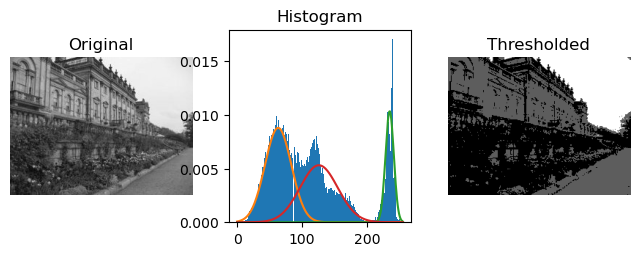

In [111]:
image = io.imread('harewood.jpg')
plot_gmm_thresh(image, 3)

/tmp/ipykernel_16233/704093916.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


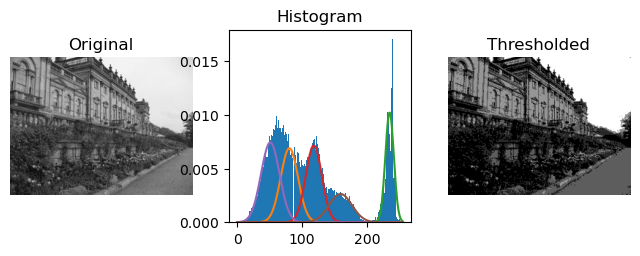

In [109]:
image = io.imread('harewood.jpg')
plot_gmm_thresh(image, 5)

/tmp/ipykernel_16233/704093916.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


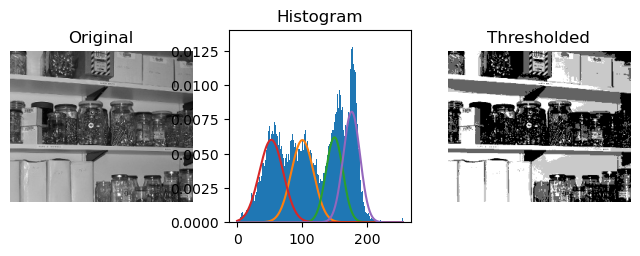

In [106]:
image = io.imread('nutsBolts.jpg')
plot_gmm_thresh(image, 4)

/tmp/ipykernel_16233/704093916.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


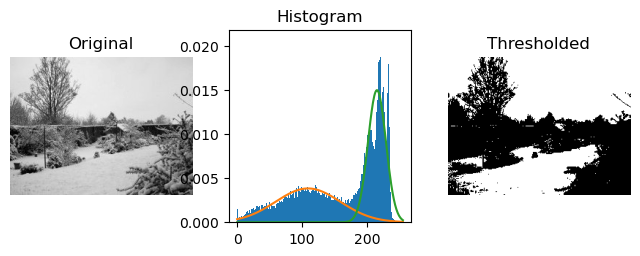

In [113]:
image = io.imread('snow.jpg')
plot_gmm_thresh(image, 2)